In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm   # pip install tqdm
from libs import stock_daum, stock_naver

In [2]:
# https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html
from matplotlib.ticker import FuncFormatter

## 코스피 종목코드 수집

+ 코스피 종목코드 : https://gist.github.com/allieus/733725662c644ab56c9db9d3cdf77ed1

In [3]:
# 코스피 지수 CSV를 읽어들입니다.
kospi_df = pd.read_csv("https://bit.ly/3g5YKXT", index_col='종목명', dtype={'종목코드': str})
print(kospi_df.shape)
kospi_df.head()

(768, 1)


,종목코드
종목명,
미원에스씨,268280
경동도시가스,267290
넷마블게임즈,251270
아이엔지생명,079440
현대건설기계,267270


In [5]:
kospi_series = kospi_df['종목코드']

## 3개 종목의 일별 거래량 크롤링

In [6]:
code = kospi_series['삼성전자']
삼성전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['LG전자']
LG전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['SK하이닉스']
SK하이닉스_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

In [8]:
삼성전자_volume_df['종가']

날짜
2021-04-28    82100.0
2021-04-27    82900.0
2021-04-26    83500.0
2021-04-23    82800.0
2021-04-22    82400.0
2021-04-21    82600.0
2021-04-20    83900.0
2021-04-19    83300.0
2021-04-16    83900.0
2021-04-15    84100.0
2021-04-14    84000.0
2021-04-13    84000.0
2021-04-12    83200.0
2021-04-09    83600.0
2021-04-08    84700.0
2021-04-07    85600.0
2021-04-06    86000.0
2021-04-05    85400.0
2021-04-02    84800.0
2021-04-01    82900.0
2021-03-31    81400.0
2021-03-30    82200.0
2021-03-29    81600.0
2021-03-26    81500.0
2021-03-25    81200.0
2021-03-24    81000.0
2021-03-23    81800.0
2021-03-22    82000.0
2021-03-19    81900.0
2021-03-18    82900.0
               ...   
2021-01-15    88000.0
2021-01-14    89700.0
2021-01-13    89700.0
2021-01-12    90600.0
2021-01-11    91000.0
2021-01-08    88800.0
2021-01-07    82900.0
2021-01-06    82200.0
2021-01-05    83900.0
2021-01-04    83000.0
2020-12-30    81000.0
2020-12-29    78300.0
2020-12-28    78700.0
2020-12-24    77800.0
2020-12

In [9]:
df = pd.DataFrame({
    '삼성전자': 삼성전자_volume_df['종가'],
    'LG전자': LG전자_volume_df['종가'],
    'SK하이닉스': SK하이닉스_volume_df['종가'],
})
print(df.shape)
df.head()

(100, 3)


,LG전자,SK하이닉스,삼성전자
날짜,,,
2021-04-28,164000.0,130000.0,82100.0
2021-04-27,167000.0,135000.0,82900.0
2021-04-26,169500.0,131500.0,83500.0
2021-04-23,163500.0,132500.0,82800.0
2021-04-22,163500.0,133000.0,82400.0


## 시각화

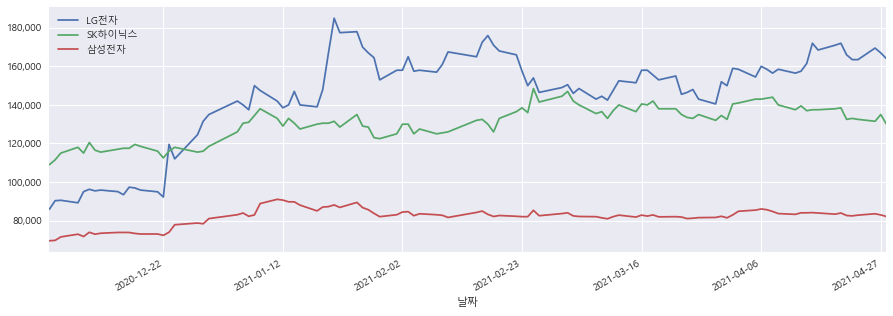

In [10]:
ax = df.plot(figsize=(15, 5))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: '{:,}'.format(int(y))))